In [4]:
import sys
import os
import yaml
from itertools import product
from collections import defaultdict
from tqdm.auto import tqdm

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from scipy import interpolate, optimize
from sklearn.linear_model import LinearRegression

import pandas as pd
from sympy import parse_expr, lambdify, latex, Symbol

In [5]:
import pickle
import matplotlib

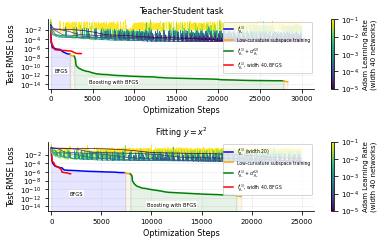

In [16]:

plt.figure(figsize=(5.5, 3.5))

ax = plt.subplot(2, 1, 1)

with open("../../data/custom/combined-techniques-teacher-student.pickle", "rb") as f:
    results = pickle.load(f)

steps = list(range(len(results['test1'])))
plt.plot(steps, results['test1'], color='blue', label=r"$f^{(1)}_{\theta_1}$")
plt.fill_between(steps, [1e-16]*len(steps), results['test1'], color='blue', alpha=0.1, 
#                  hatch='\\', 
                 edgecolor='C0')
plt.text(1250, 1e-11, "BFGS",
         bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},
         fontsize=5, backgroundcolor='white', ha='center', va='center')

steps = steps[-1] + np.array(list(range(len(results['test2']))))
plt.plot(steps, results['test2'], color='orange', label="Low-curvature subspace training")
plt.fill_between(steps, [1e-16]*len(steps), results['test2'], color='orange', alpha=0.1, hatch='\\', edgecolor='C0')

steps = steps[-1] + np.array(list(range(len(results['test3']))))
plt.plot(steps, results['test3'], color='green', label=r"$f^{(1)}_{\theta_1} + cf^{(2)}_{\theta_2}$")
plt.fill_between(steps, [1e-16]*len(steps), results['test3'], color='green', alpha=0.1,
#                  hatch='\\', 
                 edgecolor='C0')

steps = steps[-1] + np.array(list(range(len(results['test4']))))
plt.plot(steps, results['test4'], color='orange')
plt.fill_between(steps, [1e-16]*len(steps), results['test4'], color='orange', alpha=0.1, hatch='\\', edgecolor='C0')
plt.text(7500, 3e-14, "Boosting with BFGS",
         bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},
         fontsize=5, backgroundcolor='white', ha='center', va='center')

# ---------------------------------------------------
# ------------------ WIDTH-40 BFGS ------------------
# ---------------------------------------------------
with open("../../data/custom/compare-bfgs-teacher-student.pickle", "rb") as f:
    results = pickle.load(f)
plt.plot(results['test1'], label=r"$f^{(1)}_{\theta_1}$, width 40, BFGS", color='red')

# ---------------------------------------------------
# ---------------------- Adam -----------------------
# ---------------------------------------------------
with open("../../data/custom/compare-adam-lrs-teacher-student.pickle", "rb") as f:
    results = pickle.load(f)
lrs = sorted(list(results))
colors = plt.cm.viridis(np.linspace(0, 1, len(lrs)))
for lr in lrs[::-1]:
    plt.plot(results[lr]['test'], color=colors[lrs.index(lr)], linewidth=0.7)
cbar = plt.colorbar(plt.cm.ScalarMappable(matplotlib.colors.LogNorm(vmin=lrs[0], vmax=lrs[-1]), plt.cm.viridis))
cbar.ax.tick_params(labelsize=7)
cbar.set_ticks([1e-1, 1e-2, 1e-3, 1e-4, 1e-5])
cbar.ax.set_ylabel("Adam Learning Rate\n(width 40 networks)", fontsize=7)

plt.yscale('log')
plt.yticks([1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14], fontsize=7)
plt.ylabel("Test RMSE Loss", fontsize=8)
plt.ylim(1e-15, 2.0)
plt.xticks(fontsize=7)
plt.xlim(-300, None)
plt.xlabel("Optimization Steps", fontsize=8)
# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.grid(True, which="both", linestyle='-', linewidth=0.5, alpha=0.3)
legend = plt.legend(prop={'size': 4.5}, loc='upper right')
plt.setp(legend.get_title(), fontsize=4)
plt.title("Teacher-Student task", fontsize=8)


ax = plt.subplot(2, 1, 2)

with open("../../data/custom/combined-techniques-eqn.pickle", "rb") as f:
    results = pickle.load(f)

steps = list(range(len(results['test1'])))
plt.plot(steps, results['test1'], color='blue', label=r"$f^{(1)}_{\theta_1}$ (width 20)", linewidth=1.5)
plt.fill_between(steps, [1e-16]*len(steps), results['test1'], color='blue', alpha=0.1, 
#                  hatch='\\', 
                 edgecolor='C0')
plt.text(2500, 1e-11, "BFGS",
         bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},
         fontsize=5, backgroundcolor='white', ha='center', va='center')

steps = steps[-1] + 1 + np.array(list(range(len(results['test2']))))
plt.plot(steps, results['test2'], color='orange', label="Low-curvature subspace training", linewidth=1.5)
plt.fill_between(steps, [1e-16]*len(steps), results['test2'], color='orange', alpha=0.1, edgecolor='C0')

steps = steps[-1] + 1 + np.array(list(range(len(results['test3']))))
plt.plot(steps, results['test3'], color='green', label=r"$f^{(1)}_{\theta_1} + cf^{(2)}_{\theta_2}$", linewidth=1.5)
plt.fill_between(steps, [1e-16]*len(steps), results['test3'], color='green', alpha=0.1,
#                  hatch='\\', 
                 edgecolor='C0')

steps = steps[-1] + 1 + np.array(list(range(len(results['test4']))))
plt.plot(steps, results['test4'], color='orange', linewidth=1.5)
plt.fill_between(steps, [1e-16]*len(steps), results['test4'], color='orange', alpha=0.1, edgecolor='C0')
plt.text(12000, 3e-14, "Boosting with BFGS",
         bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},
         fontsize=5, backgroundcolor='white', ha='center', va='center')


with open("../../data/custom/compare-bfgs-eqn.pickle", "rb") as f:
    results = pickle.load(f)
plt.plot(results['test1'], label=r"$f^{(1)}_{\theta_1}$, width 40, BFGS", color='red', linewidth=1.5)

# ---------------------------------------------------
# ---------------------- Adam -----------------------
# ---------------------------------------------------
with open("../../data/custom/compare-adam-lrs-eqn.pickle", "rb") as f:
    results = pickle.load(f)
lrs = sorted(list(results))
colors = plt.cm.viridis(np.linspace(0, 1, len(lrs)))
for lr in lrs[::-1]:
    plt.plot(results[lr]['test'][:25000], color=colors[lrs.index(lr)], linewidth=0.7)
cbar = plt.colorbar(plt.cm.ScalarMappable(matplotlib.colors.LogNorm(vmin=lrs[0], vmax=lrs[-1]), plt.cm.viridis))
cbar.ax.tick_params(labelsize=7)
cbar.set_ticks([1e-1, 1e-2, 1e-3, 1e-4, 1e-5])
cbar.ax.set_ylabel("Adam Learning Rate\n(width 40 networks)", fontsize=7)

plt.yscale('log')
plt.yticks([1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14], fontsize=7)
plt.ylabel("Test RMSE Loss", fontsize=8)
plt.ylim(1e-15, 10)
plt.xticks(fontsize=7)
plt.xlim(-300, None)
plt.xlabel("Optimization Steps", fontsize=8)
# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.grid(True, which="both", linestyle='-', linewidth=0.5, alpha=0.3)
# legend = plt.legend(prop={'size': 5}, loc='upper right', title="Adam Learning Rate (width 40 networks)")
# plt.setp(legend.get_title(), fontsize=5)
legend = plt.legend(prop={'size': 4.5}, loc='upper right')
plt.setp(legend.get_title(), fontsize=4)
plt.title(r"Fitting $y = x^2$", fontsize=8)

plt.tight_layout()
plt.savefig('../final-figures/learning-curves-combined-techniques-two.pdf')


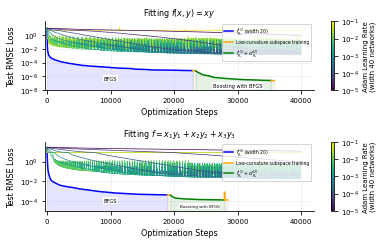

In [20]:
import pickle

plt.figure(figsize=(5.5, 3.5))

ax = plt.subplot(2, 1, 2)

with open("../../data/custom/combined-techniques-eqn-2.pickle", "rb") as f:
    results = pickle.load(f)

steps = list(range(len(results['test1'])))
plt.plot(steps, results['test1'], color='blue', label=r"$f^{(1)}_{\theta_1}$ (width 20)", linewidth=1.5)
plt.fill_between(steps, [1e-16]*len(steps), results['test1'], color='blue', alpha=0.1, 
#                  hatch='\\', 
                 edgecolor='C0')
plt.text(10000, 1e-4, "BFGS",
         bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},
         fontsize=5, backgroundcolor='white', ha='center', va='center')

steps = steps[-1] + 1 + np.array(list(range(len(results['test2']))))
plt.plot(steps, results['test2'], color='orange', label="Low-curvature subspace training", linewidth=1.5)
plt.fill_between(steps, [1e-16]*len(steps), results['test2'], color='orange', alpha=0.1, edgecolor='C0')

steps = steps[-1] + 1 + np.array(list(range(len(results['test3']))))
plt.plot(steps, results['test3'], color='green', label=r"$f^{(1)}_{\theta_1} + cf^{(2)}_{\theta_2}$", linewidth=1.5)
plt.fill_between(steps, [1e-16]*len(steps), results['test3'], color='green', alpha=0.1,
#                  hatch='\\', 
                 edgecolor='C0')

steps = steps[-1] + 1 + np.array(list(range(len(results['test4']))))
plt.plot(steps, results['test4'], color='orange', linewidth=1.5)
plt.fill_between(steps, [1e-16]*len(steps), results['test4'], color='orange', alpha=0.1, edgecolor='C0')
plt.text(24000, 3e-5, "Boosting with BFGS",
         bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},
         fontsize=4, backgroundcolor='white', ha='center', va='center')


# with open("../../data/custom/compare-bfgs-eqn-2.pickle", "rb") as f:
#     results = pickle.load(f)
# plt.plot(results['test1'], label=r"$f^{(1)}_{\theta_1}$ (width 40)", color='red', linewidth=1.5)

# ---------------------------------------------------
# ---------------------- Adam -----------------------
# ---------------------------------------------------
with open("../../data/custom/compare-adam-lrs-eqn-2.pickle", "rb") as f:
    results = pickle.load(f)
lrs = sorted(list(results))
colors = plt.cm.viridis(np.linspace(0, 1, len(lrs)))
for lr in lrs[::-1]:
    plt.plot(results[lr]['test'][:40000], color=colors[lrs.index(lr)], linewidth=0.7)
cbar = plt.colorbar(plt.cm.ScalarMappable(matplotlib.colors.LogNorm(vmin=lrs[0], vmax=lrs[-1]), plt.cm.viridis))
cbar.ax.tick_params(labelsize=7)
cbar.set_ticks([1e-1, 1e-2, 1e-3, 1e-4, 1e-5])
cbar.ax.set_ylabel("Adam Learning Rate\n(width 40 networks)", fontsize=7)

plt.yscale('log')
plt.yticks([1.0, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14], fontsize=7)
plt.ylabel("Test RMSE Loss", fontsize=8)
plt.ylim(1e-5, 100)
plt.xticks(fontsize=7)
plt.xlim(-300, None)
plt.xlabel("Optimization Steps", fontsize=8)
# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.grid(True, which="both", linestyle='-', linewidth=0.5, alpha=0.3)
# legend = plt.legend(prop={'size': 5}, loc='upper right', title="Adam Learning Rate (width 40 networks)")
# plt.setp(legend.get_title(), fontsize=5)
legend = plt.legend(prop={'size': 4.5}, loc='upper right')
plt.setp(legend.get_title(), fontsize=4)
plt.title(r"Fitting $f = x_1y_1 + x_2y_2 + x_3y_3$", fontsize=8)

# plt.tight_layout()
# plt.savefig('figures/learning-curves-combined-techniques-6dim-problem.pdf')

ax = plt.subplot(2, 1, 1)

with open("../../data/custom/combined-techniques-eqn-3.pickle", "rb") as f:
    results = pickle.load(f)

steps = list(range(len(results['test1'])))
plt.plot(steps, results['test1'], color='blue', label=r"$f^{(1)}_{\theta_1}$ (width 20)", linewidth=1.5)
plt.fill_between(steps, [1e-16]*len(steps), results['test1'], color='blue', alpha=0.1, 
#                  hatch='\\', 
                 edgecolor='C0')
plt.text(10000, 5e-7, "BFGS",
         bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},
         fontsize=5, backgroundcolor='white', ha='center', va='center')

steps = steps[-1] + 1 + np.array(list(range(len(results['test2']))))
plt.plot(steps, results['test2'], color='orange', label="Low-curvature subspace training", linewidth=1.5)
plt.fill_between(steps, [1e-16]*len(steps), results['test2'], color='orange', alpha=0.1, edgecolor='C0')

steps = steps[-1] + 1 + np.array(list(range(len(results['test3']))))
plt.plot(steps, results['test3'], color='green', label=r"$f^{(1)}_{\theta_1} + cf^{(2)}_{\theta_2}$", linewidth=1.5)
plt.fill_between(steps, [1e-16]*len(steps), results['test3'], color='green', alpha=0.1,
#                  hatch='\\', 
                 edgecolor='C0')

steps = steps[-1] + 1 + np.array(list(range(len(results['test4']))))
plt.plot(steps, results['test4'], color='orange', linewidth=1.5)
plt.fill_between(steps, [1e-16]*len(steps), results['test4'], color='orange', alpha=0.1, edgecolor='C0')
plt.text(30000, 5e-8, "Boosting with BFGS",
         bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},
         fontsize=5, backgroundcolor='white', ha='center', va='center')


# with open("../../data/custom/compare-bfgs-eqn-2.pickle", "rb") as f:
#     results = pickle.load(f)
# plt.plot(results['test1'], label=r"$f^{(1)}_{\theta_1}$ (width 40)", color='red', linewidth=1.5)

# ---------------------------------------------------
# ---------------------- Adam -----------------------
# ---------------------------------------------------
with open("../../data/custom/compare-adam-lrs-eqn-3.pickle", "rb") as f:
    results = pickle.load(f)
lrs = sorted(list(results))
colors = plt.cm.viridis(np.linspace(0, 1, len(lrs)))
for lr in lrs[::-1]:
    plt.plot(results[lr]['test'][:40000], color=colors[lrs.index(lr)], linewidth=0.7)
cbar = plt.colorbar(plt.cm.ScalarMappable(matplotlib.colors.LogNorm(vmin=lrs[0], vmax=lrs[-1]), plt.cm.viridis))
cbar.ax.tick_params(labelsize=7)
cbar.set_ticks([1e-1, 1e-2, 1e-3, 1e-4, 1e-5])
cbar.ax.set_ylabel("Adam Learning Rate\n(width 40 networks)", fontsize=7)

plt.yscale('log')
plt.yticks([1.0, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14], fontsize=7)
plt.ylabel("Test RMSE Loss", fontsize=8)
plt.ylim(1e-8, 100)
plt.xticks(fontsize=7)
plt.xlim(-300, None)
plt.xlabel("Optimization Steps", fontsize=8)
# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.grid(True, which="both", linestyle='-', linewidth=0.5, alpha=0.3)
# legend = plt.legend(prop={'size': 5}, loc='upper right', title="Adam Learning Rate (width 40 networks)")
# plt.setp(legend.get_title(), fontsize=5)
legend = plt.legend(prop={'size': 4.5}, loc='upper right')
plt.setp(legend.get_title(), fontsize=4)
plt.title(r"Fitting $f(x, y) = xy$", fontsize=8)

plt.tight_layout()
plt.savefig('../final-figures/learning-curves-combined-techniques-higherdim-problems.pdf')
